In [1]:
println("Hello from Julia!")

Hello from Julia!


In [2]:
using Pkg
Pkg.add("SymPy")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [3]:
#Question 1 part a

using SymPy
x = symbols("x")
expr = tan(x) + sqrt(sin(x))
derivative_expr = diff(expr, x)
println(derivative_expr)

tan(x)^2 + 1 + cos(x)/(2*sqrt(sin(x)))


In [4]:
#Question 1 part b
g=4*x^3+x^2+35
diff(g,x)

    2      
12⋅x  + 2⋅x

In [5]:
#Question 1 part c

using SymPy
x, y = symbols("x y")
h = y * sin(x)
g = diff(h, y)
println("g = ", g)
result = diff(g, x)
println("Result = ", result)

g = sin(x)
Result = cos(x)


In [6]:
#Question 2 part a
using SymPy
x = symbols("x")
equation = x^2 + 5*x + 6
solutions = solve(equation, x)
println("Solutions: ", solutions)

Solutions: Sym{PyCall.PyObject}[-3, -2]


In [7]:
solve(x^3+2*x,x)

3-element Vector{Sym{PyCall.PyObject}}:
          0
 -√2⋅ⅈ
  √2⋅ⅈ

In [8]:
using SymPy
@doc solve

```julia
CommonSolve.solve(args...; kwargs...)
```

Solves an equation or other mathematical problem using the algorithm specified in the arguments. Generally, the interface is:

```julia
CommonSolve.solve(prob::ProblemType,alg::SolverType; kwargs...)::SolutionType
```

where the keyword arguments are uniform across all choices of algorithms.

By default, `solve` defaults to using `solve!` on the iterator form, i.e.:

```julia
solve(args...; kwargs...) = solve!(init(args...; kwargs...))
```

```
solve
```

Use `solve` to solve algebraic equations.

# Extended help

Examples:

```jldoctest mathfuns
julia> using SymPyPythonCall


julia> @syms x y a b c d
(x, y, a, b, c, d)

julia> solve(x^2 + 2x + 1, x) # [-1]
1-element Vector{Sym{PythonCall.Py}}:
 -1

julia> solve(x^2 + 2a*x + a^2, x) # [-a]
1-element Vector{Sym{PythonCall.Py}}:
 -a

julia> u = solve([a*x + b*y-3, c*x + b*y - 1], [x,y]); show(u[x])
2/(a - c)
```

!!! note
    A very nice example using `solve` is a [blog](https://newptcai.github.io/euclidean-plane-geometry-with-julia.html) entry on [Napoleon's theorem](https://en.wikipedia.org/wiki/Napoleon%27s_theorem) by Xing Shi Cai.


!!! note "Systems"
    Use a tuple, not a vector, of equations when there is more than one.



In [9]:
#Question 2 part b

equation = x^3 + 2*x

# Solve the equation
solutions = solve(equation, x)

# Filter out only the real solutions
real_solutions = filter(isreal, solutions)

1-element Vector{Sym{PyCall.PyObject}}:
 0

In [10]:
# Question 3 part a
using SymPy
x = symbols("x")
y = symbols("y", cls=SymFunction)
DE = diff(y(x), x) - 2*x - y(x)
solution = dsolve(DE, y(x))
println("Solution: ", solution)

Solution: Eq(y(x), C1*exp(x) - 2*x - 2)


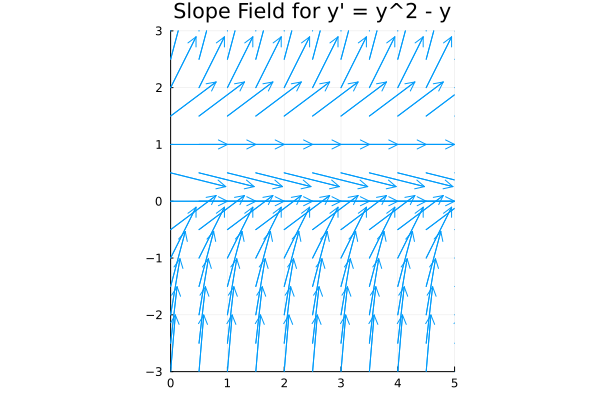

In [11]:
using Plots

# Define the function f(x, y)
f(x, y) = y^2 - y

# Define the range for x and y
x_range = 0:0.5:5
y_range = -3:0.5:3

# Create a grid of points
x = repeat(x_range, outer=length(y_range))
y = repeat(y_range, inner=length(x_range))

# Compute the slopes
u = ones(length(x))
v = f.(x, y)

# Normalize the slopes for better visualization
norm = sqrt.(u.^2 + v.^2)
u ./= norm
v ./= norm

# Plot the slope field
quiver(x, y, quiver=(u, v), xlims=(0, 5), ylims=(-3, 3), aspect_ratio=:equal, title="Slope Field for y' = y^2 - y")

In [12]:
using SymPy

# Define the symbolic variable and function
x = symbols("x")
y = symbols("y", cls=SymFunction)

# Define the differential equation
DE = diff(y(x), x) - (y(x)^2 - y(x))

# Solve the differential equation
solution = dsolve(DE, y(x))

# Print the solution
println("Solution: ", solution)

Solution: Eq(y(x), C1/(C1 - exp(x)))


In [13]:
#Question 3 part b

using SymPy

# Define the symbolic variable and function
x = symbols("x")
y = symbols("y", cls=SymFunction)

# Define the differential equation
DE = diff(y(x), x) - tan(x + y(x)) + 1

# Solve the differential equation
solution = dsolve(DE, y(x))

# Print the solution
println("Solution: ", solution)

Solution: Sym{PyCall.PyObject}[Eq(y(x), -x - asin(C1*exp(x))), Eq(y(x), -x + asin(C1*exp(x)) + pi)]


In [14]:
#Question 3 part c'

using SymPy

# Define the symbolic variable and function
x = symbols("x")
y = symbols("y", cls=SymFunction)

# Define the differential equation
DE = diff(y(x), x, 2) + 2*diff(y(x), x) + y(x)

# Define the initial conditions
# y(0) = 3, y'(pi/2) = 2
ics = Dict(y(0) => 3, diff(y(x), x).subs(x, pi/2) => 2)

# Solve the differential equation with initial conditions
solution = dsolve(DE, y(x), ics=ics)

# Print the solution
println("Solution: ", solution)

Solution: Eq(y(x), (3.0 - 22.1111352149009*x)*exp(-x))


In [15]:
#Question 3 part c

using SymPy

# Define the symbolic variable and function
x = symbols("x")
y = symbols("y", cls=SymFunction)

# Define the differential equation
DE = diff(y(x), x, 2) + 2*diff(y(x), x) + y(x)

# Solve the differential equation
solution = dsolve(DE, y(x))

# Print the solution
println("Solution: ", solution)

Solution: Eq(y(x), (C1 + C2*x)*exp(-x))


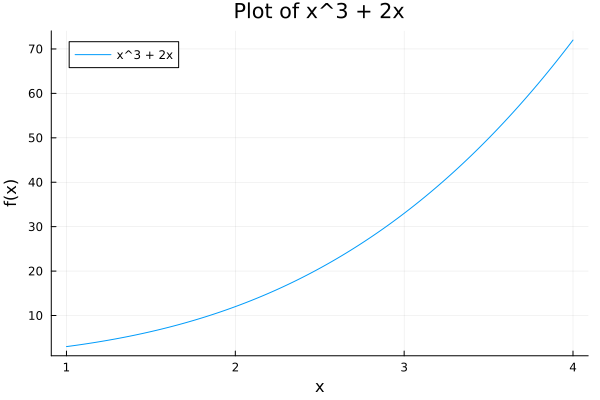

In [16]:
#Question 4 part a

using Plots

# Define the function
f(x) = x^3 + 2*x

# Define the range for x
x_range = 1:0.01:4

# Plot the function
plot(x_range, f.(x_range), xlabel="x", ylabel="f(x)", label="x^3 + 2x", title="Plot of x^3 + 2x", legend=:topleft)

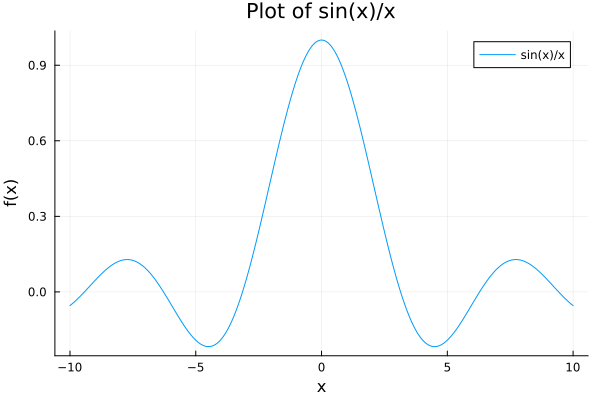

In [17]:
#Question 4 part a

using Plots

# Define the function
f(x) = sin(x) / x

# Handle the case where x = 0 to avoid division by zero
f(x) = x == 0 ? 1.0 : sin(x) / x

# Define the range for x
x_range = -10:0.01:10

# Plot the function
plot(x_range, f.(x_range), xlabel="x", ylabel="f(x)", label="sin(x)/x", title="Plot of sin(x)/x", legend=:topright)

In [18]:
f(x)=sin(x)/x
f(1)

0.8414709848078965

In [19]:
f(0)

NaN

In [20]:
using SymPy

# Define the symbolic variable and function
x = symbols("x")
y = symbols("y", cls=SymFunction)

# Define the differential equation
DE = diff(y(x), x, 2) - diff(y(x), x) + y(x)

# Solve the differential equation
solution = dsolve(DE, y(x))

# Print the solution
println("Solution: ", solution)

Solution: Eq(y(x), (C1*sin(sqrt(3)*x/2) + C2*cos(sqrt(3)*x/2))*exp(x/2))


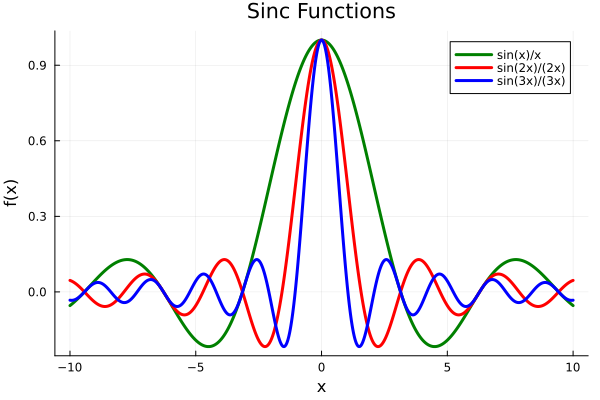

In [21]:
using Plots

# Define the functions
f0(x) = sin(x) / x
f1(x) = sin(2x) / (2x)
f2(x) = sin(3x) / (3x)

# Handle the case where x = 0 to avoid division by zero
f0(x) = x == 0 ? 1.0 : sin(x) / x
f1(x) = x == 0 ? 1.0 : sin(2x) / (2x)
f2(x) = x == 0 ? 1.0 : sin(3x) / (3x)

# Define the ranges for x
x_range0 = -10:0.01:10
x_range1 = -10:0.01:10
x_range2 = -10:0.01:10

# Plot the functions
plot(x_range0, f0.(x_range0), label="sin(x)/x", linewidth=3, color=:green, legend=:topright)
plot!(x_range1, f1.(x_range1), label="sin(2x)/(2x)", linewidth=3, color=:red)
plot!(x_range2, f2.(x_range2), label="sin(3x)/(3x)", linewidth=3, color=:blue)

# Add gridlines and customize the plot
plot!(xlabel="x", ylabel="f(x)", title="Sinc Functions", grid=true)

In [22]:
#Question 6 part a

s = 0
for i in 0:99
    if i % 2 == 1
        s += i
    end
end
println(s)

2500


In [23]:
s = 0
for i in 1:2:99
    s += i
end
println(s)

2500


In [24]:
1im^2

-1 + 0im

In [25]:
#Sometimes "dsolve" can't help to solve a problem. The following example won't work.

using SymPy

# Define the symbolic variable and function
x = symbols("x")
y = symbols("y", cls=SymFunction)

# Define the differential equation
DE = diff(y(x), x) - (sin(x) * y(x) / x) + x

# Define the initial condition y(1) = 1
ics = Dict(y(1) => 1)

# Solve the differential equation with the initial condition
solution = dsolve(DE, y(x), ics=ics)

# Print the solution
println("Solution: ", solution)

Solution: Eq(Integral((x^2 - y(x)*sin(x))*exp(-Si(x))/x, x), Integral(x*exp(-Si(x)), (x, 1)) + Integral(-y(x)*exp(-Si(x))*sin(x)/x, (x, 1)))


In [26]:
# Create an empty array
p = []

# Append 2 to the array
push!(p, 2)
println(p)

# Append 7 to the array
push!(p, 7)
println(p)

# Create a vector (1D array)
pts = [2, 3]

# Append the vector to the array
push!(p, pts)

# Print the array
println(p)

Any[2]
Any[2, 7]
Any[2, 7, [2, 3]]


In [27]:
# Define the function
function f(a, b)
    result = a + b
    return result
end

# Call the function and print the result
println(f(5, -2))

3


In [28]:
# Define the function
function allin(n)
    v = []
    for i in 0:1:n
        push!(v, i)
    end
    return v
end

# Call the function and print the result
println(allin(9))

Any[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [29]:
# Define the function
function even(n)
    v = []
    for i in 0:(n-1)
        if i % 2 == 1
            push!(v, i)
        end
    end
    return v
end

# Call the function and print the result
println(even(10))

Any[1, 3, 5, 7, 9]


In [30]:
# Define the function
function f(x)
    if x == 0
        return 1.0
    else
        return sin(x) / x
    end
end

# Call the function and print the results
println(f(0))  # Output: 1.0
println(f(1))  # Output: 0.8414709848078965

1.0
0.8414709848078965


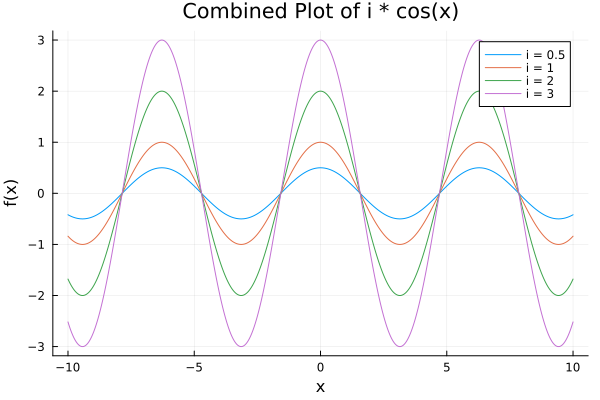

In [31]:
using Plots

# Define the function
function f(i)
    # Define the range for x
    x_range = -10:0.01:10

    # Define the function to plot
    y(x) = i * cos(x)

    # Return the y values for the given x range
    return y.(x_range)
end

# Create the x range
x_range = -10:0.01:10

# Initialize the plot with the first function (i = 0.5)
plot(x_range, f(0.5), label="i = 0.5", xlabel="x", ylabel="f(x)", title="Combined Plot of i * cos(x)", legend=:topright)

# Add the other plots
plot!(x_range, f(1), label="i = 1")
plot!(x_range, f(2), label="i = 2")
plot!(x_range, f(3), label="i = 3")

# Display the combined plot
display(current())